In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
## showing some data
raw_data = pd.read_csv("Data/data_enhanced.csv")
raw_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review,rate
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,NaN,0.00
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,NaN,0.00
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,0.00
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,NaN,0.00
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Luna was very accommodating and extremely help...,4.67


In [3]:
## Data information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
## About missing value 
for feature in raw_data.columns:
    tmp = raw_data[feature]
    print("There are {} missing value in the {}".format(sum(raw_data[feature].isna()), feature))
    

There are 0 missing value in the id
There are 16 missing value in the name
There are 0 missing value in the host_id
There are 21 missing value in the host_name
There are 0 missing value in the neighbourhood_group
There are 0 missing value in the neighbourhood
There are 0 missing value in the latitude
There are 0 missing value in the longitude
There are 0 missing value in the room_type
There are 0 missing value in the price
There are 0 missing value in the minimum_nights
There are 0 missing value in the number_of_reviews
There are 10052 missing value in the last_review
There are 10052 missing value in the reviews_per_month
There are 0 missing value in the calculated_host_listings_count
There are 0 missing value in the availability_365
There are 20154 missing value in the review
There are 0 missing value in the rate


## Clean price

In [5]:

raw_data["log_price"] = np.log(raw_data["price"] + 1)
raw_data["price_zscore"] = (raw_data["log_price"] - raw_data["log_price"].mean())/ raw_data["log_price"].std(ddof=0)
raw_data = raw_data[np.abs(raw_data["price_zscore"]) <= 3  ]


In [6]:
raw_data = raw_data.drop(columns=["log_price", "price_zscore"])

## minimum_nights

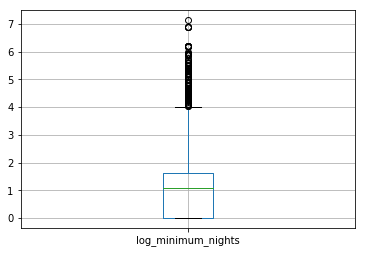

In [7]:
## Minimum_Night
raw_data["log_minimum_nights"] = np.log(raw_data["minimum_nights"]) # log nigths

# plots
plot_info = raw_data.boxplot(column="log_minimum_nights", return_type='dict')

# Delete outlier
threshold = plot_info["whiskers"][1].get_ydata()[1]
raw_data = raw_data[raw_data["log_minimum_nights"] <= threshold]
# print("There are " , price_deleted["log_nights"].count() - mini_nights_deleted["log_nights"].count() , "outliers")
raw_data = raw_data.drop(columns= ["log_minimum_nights"])

## Last Review

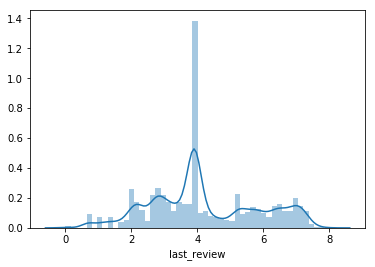

In [8]:
## Last_review
raw_data["last_review"] = pd.to_datetime(raw_data["last_review"], format='%Y-%m-%d')
max_date = raw_data["last_review"].max()
raw_data["last_review"] = (max_date - raw_data["last_review"]).dt.days
raw_data["last_review"] = raw_data["last_review"].fillna(raw_data[~raw_data["last_review"].isna()]["last_review"].median())
sns.distplot(np.log(raw_data["last_review"]+1))
# rate

## Rate

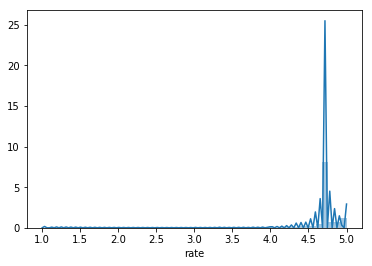

In [9]:
# Rate
tmp = raw_data[raw_data["rate"] > 0]
raw_data["rate"] = raw_data["rate"].replace(0,tmp["rate"].mean())
sns.distplot(raw_data["rate"])

In [13]:
raw_data.index = range(len(raw_data))

In [14]:
raw_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review,rate
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,262.0,0.21,6,365,NaN,4.711709
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,48.0,0.38,2,355,NaN,4.711709
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,49.0,NaN,1,365,NaN,4.711709
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,3.0,4.64,1,194,NaN,4.711709
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,231.0,0.10,1,0,Luna was very accommodating and extremely help...,4.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48077,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,49.0,NaN,2,9,Sabrina's place is a nice apartement in a good...,3.670000
48078,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,49.0,NaN,2,36,The host canceled this reservation the day bef...,4.711709
48079,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,49.0,NaN,1,27,We’re here to help your trip go smoothly. Ever...,4.711709
48080,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,49.0,NaN,6,2,NaN,4.711709


In [15]:
raw_data.to_csv("Data/CleanedData.csv", index=False)

In [16]:
test = pd.read_csv("Data/CleanedData.csv")
test

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review,rate
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,262.0,0.21,6,365,NaN,4.711709
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,48.0,0.38,2,355,NaN,4.711709
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,49.0,NaN,1,365,NaN,4.711709
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,3.0,4.64,1,194,NaN,4.711709
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,231.0,0.10,1,0,Luna was very accommodating and extremely help...,4.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48077,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,49.0,NaN,2,9,Sabrina's place is a nice apartement in a good...,3.670000
48078,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,49.0,NaN,2,36,The host canceled this reservation the day bef...,4.711709
48079,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,49.0,NaN,1,27,We’re here to help your trip go smoothly. Ever...,4.711709
48080,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,49.0,NaN,6,2,NaN,4.711709
